In [1]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')

In [30]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_exploration.data_exploration import *

In [4]:
df = read_sqlite_table('housedata', './data/processed/rome_house_cleaned.db')

In [6]:
df.dtypes

latitude        float64
longitude       float64
price           float64
buildingYear    float64
surface           int64
rooms            object
bathrooms        object
floor            object
garage           object
isNew             int64
luxury            int64
typology         object
condition        object
balcone           int64
terrazza          int64
cantina           int64
piscina           int64
giardino          int64
dtype: object

In [7]:
df.describe()

,latitude,longitude,price,buildingYear,surface,isNew,luxury,balcone,terrazza,cantina,piscina,giardino
count,15548.000000,15548.000000,1.554800e+04,12676.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000,15548.000000
mean,41.895750,12.492161,4.808978e+05,1963.364784,127.336249,0.058850,0.116285,0.608310,0.337407,0.297787,0.024312,0.317983
std,0.040559,0.055270,4.204685e+06,50.900014,1931.838312,0.235351,0.320577,0.488144,0.472840,0.457300,0.154020,0.465708
min,41.793400,12.375200,7.000000e+02,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.867100,12.446500,2.200000e+05,1960.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.896099,12.489500,3.100000e+05,1965.000000,93.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,41.927924,12.537800,4.800000e+05,1980.000000,129.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,41.989700,12.614900,5.200000e+08,2024.000000,240700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# rimozione valori estremi derivanti da erorri nei dati

In [12]:
df.nsmallest(10, 'price', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,luxury,typology,condition,balcone,terrazza,cantina,piscina,giardino
10380,41.890202,12.467800,700.0,1800.0,20,2,1,2,0,1,0,Appartamento,Buono / Abitabile,0,0,0,0,0
12007,41.925098,12.466600,1590.0,1920.0,82,3,2,None,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,1,0,1
13245,41.910500,12.552400,8900.0,NaN,65,4,1,1,0,0,0,Appartamento,None,0,0,0,1,0
5039,41.968811,12.452130,17440.0,NaN,17,1,2,T,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,0
4963,41.967800,12.434600,25000.0,1970.0,30,2,1,S,0,0,0,Appartamento,Da ristrutturare,0,0,0,0,0
15317,41.895763,12.471569,25000.0,1600.0,80,3,2,T,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,0
4720,41.967602,12.435800,29000.0,1970.0,30,1,1,S,0,1,0,Appartamento,Da ristrutturare,0,0,0,0,0
4934,41.967800,12.434600,29000.0,1970.0,28,1,1,None,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,0,0,0
4458,41.954399,12.397300,30000.0,NaN,35,1,1,S,0,0,0,Loft,Buono / Abitabile,0,0,0,0,0
4848,41.967800,12.434700,32000.0,1965.0,24,1,1,S,0,0,0,Appartamento,Da ristrutturare,0,0,0,0,0


In [16]:
df = df[df['price']>=25000]

In [22]:
df.nlargest(10, 'price', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,luxury,typology,condition,balcone,terrazza,cantina,piscina,giardino
11152,41.942799,12.4457,15000000.0,1950.0,2150,5+,3+,None,1,0,1,Villa,Buono / Abitabile,1,1,1,1,1
12695,41.918301,12.5029,12000000.0,1930.0,1400,5+,3+,None,2,0,1,Villa,Buono / Abitabile,1,1,1,1,1
15216,41.904099,12.4870,12000000.0,1800.0,4000,5+,3+,None,0,0,1,Casa indipendente,Buono / Abitabile,1,1,0,0,0
15506,41.883701,12.4875,12000000.0,2011.0,820,5+,3+,None,4,0,1,Villa,Nuovo / In costruzione,1,1,1,1,1
2492,41.879501,12.3859,11000000.0,2010.0,721,5+,3+,None,2,0,1,Villa,Ottimo / Ristrutturato,1,0,1,1,1
9516,41.866699,12.4506,10000000.0,1939.0,2000,5+,3+,None,None,0,1,Villa,Buono / Abitabile,1,1,1,0,1
2292,41.884300,12.3862,9800000.0,1990.0,1200,5+,3+,None,2,0,1,Villa,Ottimo / Ristrutturato,0,1,1,1,1
10394,41.884399,12.4731,9800000.0,1800.0,500,5+,3+,6,1,0,1,Attico - Mansarda,Ottimo / Ristrutturato,1,1,0,0,0
14935,41.896099,12.4692,9500000.0,NaN,1550,5+,3+,None,0,0,1,Casa indipendente,Buono / Abitabile,1,1,1,0,0
14964,41.904900,12.4799,8500000.0,1700.0,351,5+,3+,None,0,0,1,Attico - Mansarda,Ottimo / Ristrutturato,1,1,1,0,0


In [21]:
df = df[df['price']<=15000000]

In [25]:
df.nlargest(10, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,luxury,typology,condition,balcone,terrazza,cantina,piscina,giardino
15216,41.904099,12.4870,12000000.0,1800.0,4000,5+,3+,None,0,0,1,Casa indipendente,Buono / Abitabile,1,1,0,0,0
15262,41.897598,12.4769,2430000.0,1700.0,2740,5+,3,4,0,0,1,Appartamento,Buono / Abitabile,1,0,0,0,0
14361,41.875301,12.5029,4450000.0,1970.0,2540,5+,3+,None,2,0,0,Villa,Buono / Abitabile,1,1,1,1,1
11152,41.942799,12.4457,15000000.0,1950.0,2150,5+,3+,None,1,0,1,Villa,Buono / Abitabile,1,1,1,1,1
9516,41.866699,12.4506,10000000.0,1939.0,2000,5+,3+,None,None,0,1,Villa,Buono / Abitabile,1,1,1,0,1
4837,41.957001,12.4579,1950000.0,1980.0,1920,5+,3+,None,1,0,0,Villa,Buono / Abitabile,1,1,1,1,1
10773,41.895901,12.4526,2000000.0,NaN,1800,5+,3,None,0,0,0,Rustico - Casale,Da ristrutturare,0,1,0,0,1
2754,41.884998,12.3877,4200000.0,1960.0,1700,5+,3+,None,None,0,0,Rustico - Casale,Buono / Abitabile,1,1,1,1,1
14935,41.896099,12.4692,9500000.0,NaN,1550,5+,3+,None,0,0,1,Casa indipendente,Buono / Abitabile,1,1,1,0,0
11041,41.952000,12.4456,3800000.0,1960.0,1433,5+,3+,None,2,0,0,Villa,Da ristrutturare,1,1,1,0,1


In [24]:
df = df[df['surface']<240700]

In [26]:
df.nsmallest(10, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,luxury,typology,condition,balcone,terrazza,cantina,piscina,giardino
8010,41.879398,12.5674,120000.0,1950.0,1,1,1,2,0,0,0,Appartamento,Buono / Abitabile,1,0,0,0,1
4451,41.946999,12.3886,125000.0,1966.0,3,2,1,2,0,0,0,Appartamento,Buono / Abitabile,0,1,0,0,0
12562,41.915699,12.5095,110000.0,1930.0,10,1,1,T,0,0,0,Loft,Buono / Abitabile,0,0,0,0,0
4933,41.965401,12.4568,35000.0,NaN,12,1,1,S,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,0,0,0
4990,41.967400,12.4341,32000.0,1975.0,12,1,1,S,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,1
14896,41.903900,12.4843,210000.0,1800.0,12,1,1,6,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,0,0,0
5007,41.968201,12.4357,59000.0,1973.0,14,1,1,R,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,0
11122,41.943401,12.4398,59000.0,1970.0,15,1,1,T,0,0,0,Appartamento,Da ristrutturare,0,0,0,0,0
11199,41.948700,12.4452,66000.0,1977.0,15,1,1,T,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,1
13794,41.894699,12.5154,103000.0,1950.0,15,1,1,T,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,0


In [27]:
df = df[df['surface']>3]

In [28]:
df.nsmallest(10, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,luxury,typology,condition,balcone,terrazza,cantina,piscina,giardino
12562,41.915699,12.5095,110000.0,1930.0,10,1,1,T,0,0,0,Loft,Buono / Abitabile,0,0,0,0,0
4933,41.965401,12.4568,35000.0,NaN,12,1,1,S,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,0,0,0
4990,41.967400,12.4341,32000.0,1975.0,12,1,1,S,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,1
14896,41.903900,12.4843,210000.0,1800.0,12,1,1,6,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,0,0,0
5007,41.968201,12.4357,59000.0,1973.0,14,1,1,R,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,0
11122,41.943401,12.4398,59000.0,1970.0,15,1,1,T,0,0,0,Appartamento,Da ristrutturare,0,0,0,0,0
11199,41.948700,12.4452,66000.0,1977.0,15,1,1,T,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,1
13794,41.894699,12.5154,103000.0,1950.0,15,1,1,T,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,0
13201,41.909302,12.5396,140000.0,1960.0,16,1,1,1,0,0,0,Appartamento,Buono / Abitabile,1,0,0,0,0
14113,41.875401,12.5184,79000.0,1930.0,16,1,1,S,0,0,0,Appartamento,Da ristrutturare,0,0,0,0,0


In [ ]:
df['garage'].value_counts()

0       10439
1        4094
2         893
3          62
4          27
None       25
Name: garage, dtype: int64

In [33]:
df1 = df.copy()
df1.duplicated().sum()

666

In [34]:
df1 = df1.drop_duplicates(keep='first', inplace=False, ignore_index=True)
df1.shape

(14874, 18)

<Axes: xlabel='buildingYear', ylabel='Count'>

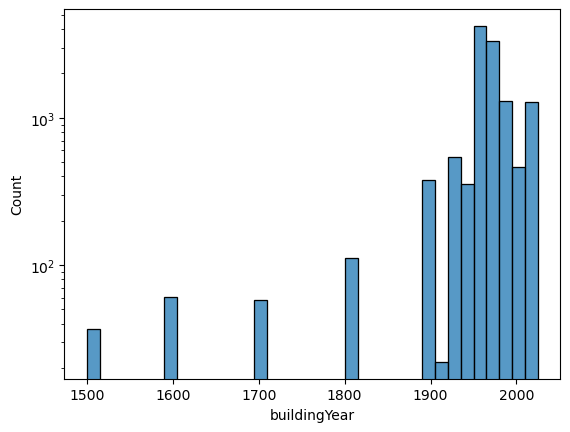

In [40]:
sns.histplot(x=df1['buildingYear'],binwidth=15, discrete=False, log_scale=[False,True])

<Axes: xlabel='surface', ylabel='Count'>

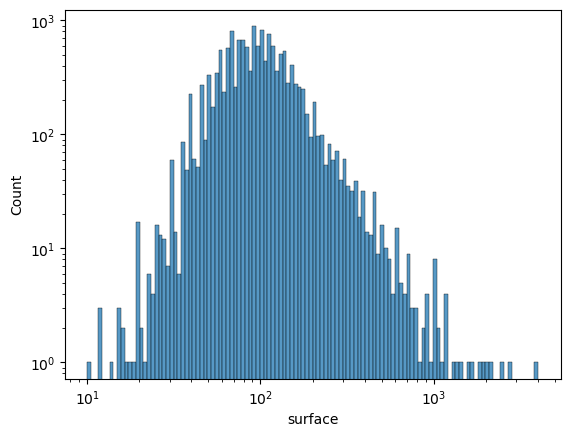

In [38]:
sns.histplot(x=df1['surface'],discrete=False, log_scale=[True,True])

<Axes: >

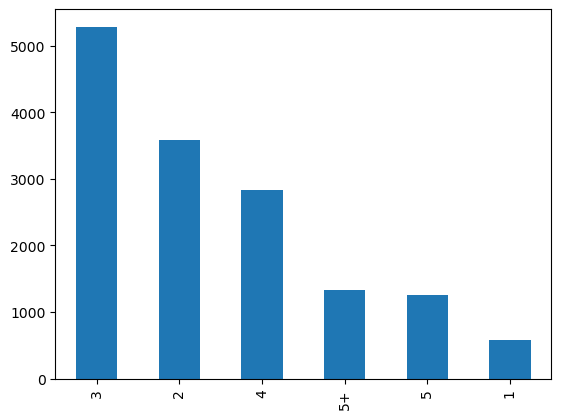

In [72]:
df1['rooms'].value_counts().plot(kind='bar')

<Axes: >

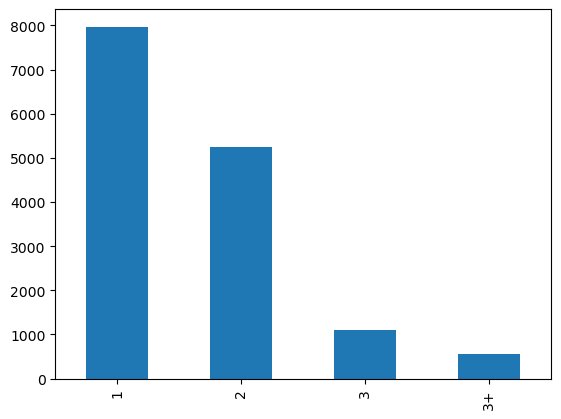

In [71]:
df1['bathrooms'].value_counts().plot(kind='bar')

<Axes: >

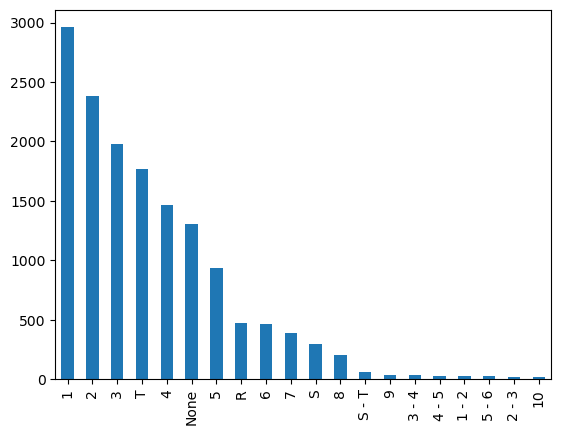

In [70]:
df1['floor'].value_counts().plot(kind='bar')

<Axes: >

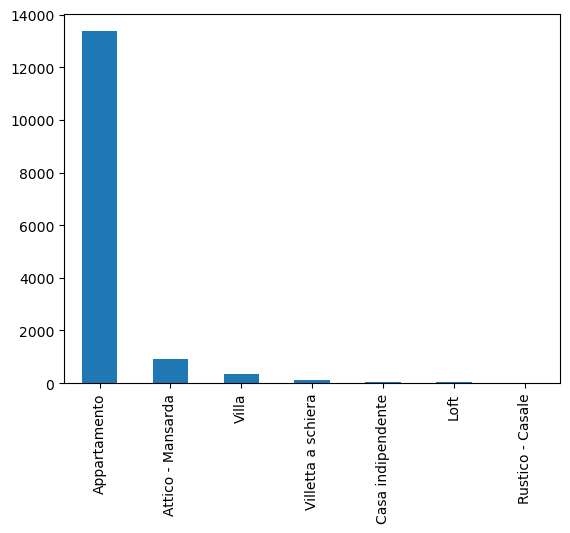

In [75]:
df1['typology'].value_counts().plot(kind='bar')

<Axes: >

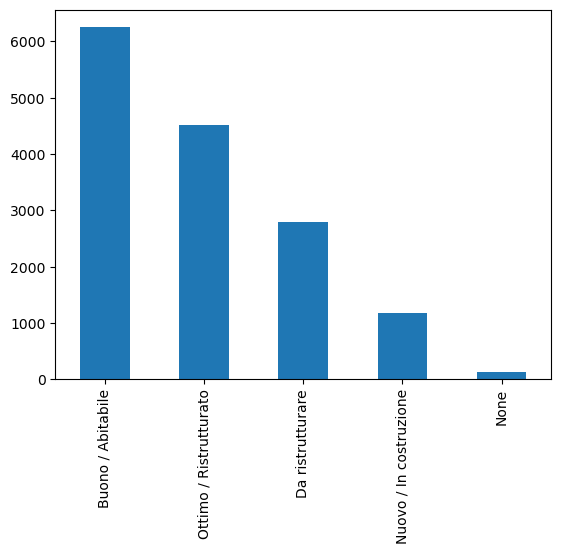

In [76]:
df1['condition'].value_counts().plot(kind='bar')

In [77]:
df1.describe()

,latitude,longitude,price,buildingYear,surface,isNew,luxury,balcone,terrazza,cantina,piscina,giardino
count,14874.000000,14874.000000,1.487400e+04,12145.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000
mean,41.895232,12.491660,4.522013e+05,1962.144833,112.873538,0.059701,0.118731,0.606024,0.340796,0.302071,0.025010,0.323114
std,0.040501,0.054762,5.736166e+05,50.766810,97.266286,0.236941,0.323482,0.488646,0.473993,0.459171,0.156161,0.467682
min,41.793400,12.375200,2.500000e+04,1500.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.866798,12.446500,2.250000e+05,1960.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.895500,12.488800,3.150000e+05,1965.000000,94.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,41.927200,12.536700,4.850000e+05,1980.000000,130.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,41.989700,12.614900,1.500000e+07,2024.000000,4000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
